In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import wordnet

from keras.models import load_model

import re

In [2]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [3]:
word_to_index, index_to_word, word2vec = read_glove_vecs('data/glove.6B.200d.txt')

# Data Pre processing

In [113]:
def load_and_clean_data(filename):
    file = open(filename, 'r')
    data = file.read().lower()
    file.close()

    data = data.split('\n')

    pro_data = []
    for sent in data:
        pro_data.append(re.sub(r"[^\w\s]", '', sent))

    return pro_data

In [114]:
stopwords = nltk.corpus.stopwords.words('english')
# news_words = [w for w in brown.words(categories=['news']) if w.isalpha() and w not in stopwords]
# new_data = [for sent.lower().split(" ")  for sent in data]

def remove_stopwords(data):
    new_data = []

    for sent in data:
        temp = []
        for word in sent.lower().split(' '):
            if word not in stopwords:
                temp.append(word)

        new_data.append(temp)
    
    return new_data

def get_features(new_data):
    X = []
    for sent in new_data:
        res = np.zeros(word2vec['word'].shape)
        for word in sent:
            try:
                res += word2vec[word]
            except:
                res += 0
        X.append(res)

    X = np.array(X)
    return X

In [285]:
data = load_and_clean_data("requirements/TCS/security.txt")
new_data = remove_stopwords(data)
X = get_features(new_data)
# new_data
print("Shape of X:", X.shape)
data

Shape of X: (10, 200)


['links that provide communications between the tcs and other systems shall be secured in a manner appropriate for the sensitivities of the material passed through such links',
 'the tcs shall be designed to protect its communication and data links against enemy electronic warfare ew threats physical antiradiation weaponry and physical destruction ',
 'all hardware software documentation and sensitive information processed by tcs shall be physically protected minimally at the level determined by the risk index computed in section 381',
 'the tcs shall be approved for operation at the same level as the systems with which it interfaces ',
 'all tcs users operators maintainers and other personnel having access to tcs shall be cleared to the highest sensitivity of the data that the tcs processes stores and transfers ',
 'additional local site procedures shall be developed to prevent the intentional or unintentional disclosure of sensitive information to unauthorized individuals ',
 'a trai

# Getting Cluster

In [286]:
result = []
for sent1 in X:
    res = []
    for sent2 in X:
        val = np.average(np.abs(sent1 - sent2))
        res.append(round(val, 4))
    result.append(res)
    
result = np.array(result)

In [287]:
df = pd.DataFrame(result)
df.head(11)

,0,1,2,3,4,5,6,7,8,9
0,0.0000,1.7978,1.9392,1.3748,1.7191,1.6112,1.9574,1.8438,1.8438,1.8438
1,1.7978,0.0000,2.1838,2.1586,2.1594,2.0309,2.3445,2.6186,2.6186,2.6186
2,1.9392,2.1838,0.0000,2.0611,1.7317,1.9553,2.3729,2.6398,2.6398,2.6398
3,1.3748,2.1586,2.0611,0.0000,1.6970,1.9703,2.0003,1.1386,1.1386,1.1386
4,1.7191,2.1594,1.7317,1.6970,0.0000,2.1275,2.3601,2.3995,2.3995,2.3995
5,1.6112,2.0309,1.9553,1.9703,2.1275,0.0000,2.1972,2.2872,2.2872,2.2872
6,1.9574,2.3445,2.3729,2.0003,2.3601,2.1972,0.0000,2.4348,2.4348,2.4348
7,1.8438,2.6186,2.6398,1.1386,2.3995,2.2872,2.4348,0.0000,0.0000,0.0000
8,1.8438,2.6186,2.6398,1.1386,2.3995,2.2872,2.4348,0.0000,0.0000,0.0000
9,1.8438,2.6186,2.6398,1.1386,2.3995,2.2872,2.4348,0.0000,0.0000,0.0000


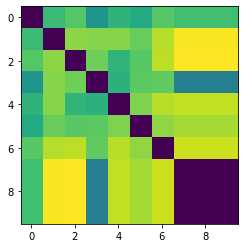

In [288]:
plt.imshow(result)
plt.show()

In [289]:
clus = []
for i in range(len(result)):
    min_elm = 100000000000
    idx_i = -1
    idx_j = -1
    
    for j in range(len(result)):    
        if(min_elm > result[i, j] and result[i, j] != 0):
            min_elm = result[i, j]
            idx_i = i
            idx_j = j
    
    clus.append((min(idx_i, idx_j), max(idx_i, idx_j)))
    
clus = set(clus)

In [290]:
for item in clus:
    print(data[item[0]])
    print(data[item[1]])
    print()

links that provide communications between the tcs and other systems shall be secured in a manner appropriate for the sensitivities of the material passed through such links
the tcs shall be designed to protect its communication and data links against enemy electronic warfare ew threats physical antiradiation weaponry and physical destruction 

all hardware software documentation and sensitive information processed by tcs shall be physically protected minimally at the level determined by the risk index computed in section 381
all tcs users operators maintainers and other personnel having access to tcs shall be cleared to the highest sensitivity of the data that the tcs processes stores and transfers 

the tcs shall be approved for operation at the same level as the systems with which it interfaces 
 

the tcs shall be approved for operation at the same level as the systems with which it interfaces 
all tcs users operators maintainers and other personnel having access to tcs shall be cle

# Contradiction Detection Model

In [291]:
# cd_model = load_model('contradiction_detection_model.h5')

In [292]:
SENT_SIZE = 40

def convert_sent_to_emb(X, word_to_vec):
    data = np.zeros((len(X), SENT_SIZE, len(word_to_vec['word'])))
    
    for i, sent in enumerate(X):
        for j, word in enumerate(sent.split()):
            try:
                data[i, j, :] = word_to_vec[word]
            except:
                pass
            
    return data

In [293]:
ant = pd.read_csv('data/antonyms.txt', delimiter = '\t')
ant['Antonym'] = ant['Antonym'].str.split()

words = ant['Root'].values
ant_list = ant['Antonym'].values

ant_dict = {}
for word, ant_l in zip(words, ant_list):
    ant_dict[word] = ant_l

ant.head()

,Root,Antonym
0,elongated,[stunted]
1,thinskinned,[thickskinned]
2,tactful,[tactless]
3,orphaned,[privileged]
4,laconic,"[glib,, garrulous,, talkative,, gossipy,, chat..."


In [294]:
def sent_to_list(sent1, sent2):
    l1 = sent1.lower().split()
    l2 = sent2.lower().split()
    return l1, l2

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

negation_list = ['No', 'Not','None','No one','Nobody','Nothing','Neither','Nowhere','Never','Hardly','Scarcely','Barely','Doesn’t','Isn’t','Wasn’t','Shouldn’t','Wouldn’t','Couldn’t','Won’t','Can’t','Don’t']
for i in range(len(negation_list)):
    negation_list[i] = negation_list[i].lower().replace("’", "")

def isNegation(list1, list2, negation_list):
    for word in list1:
        if word in negation_list:
            return True
    
    for word in list2:
        if word in negation_list:
            return True
        
    return False

def get_antonyms(word, ant_dict):
    ant = []
    for s in wordnet.synsets(word):
        for l in s.lemmas():
            if l.antonyms():
                ant.append(l.antonyms()[0].name())
                
    ans = list(set(ant))
    if word in ant_dict:
        ans.extend(ant_dict[word])
        
    return ans

def isAntonym(sent1, sent2):
    for w1 in sent1.split(' '):
        for w2 in sent2.split(' '):
            if w2 in get_antonyms(w1, ant_dict):
                return True
    return False

def is_numeric_mismatch(l1, l2):
    for word1 in l1:
        if word1.isnumeric():
            for word2 in l2:
                if word2.isnumeric() and word1 != word2:
                    return True
    return False

In [295]:
contra_count = 0
isant_count = 0
neg_count = 0
isnum_count = 0

for item in clus:
    sent1 = data[item[0]]
    sent2 = data[item[1]]
    
    l1, l2 = sent_to_list(sent1, sent2)
    iou = jaccard_similarity(l1, l2)
    neg = isNegation(l1, l2, negation_list)
    isAnt = isAntonym(sent1, sent2)
    isNum = is_numeric_mismatch(l1, l2)
    
    s1 = convert_sent_to_emb([sent1.lower()], word2vec)
    s2 = convert_sent_to_emb([sent2.lower()], word2vec)
    
    pred = cd_model.predict([s1, s2, np.array([iou, neg, isAnt], dtype = float).reshape(1, 3)])
    
    if pred[0][0] < 0.5 or isAnt or neg or isNum:
        print(sent1)
        print(sent2)
        if pred[0][0] < 0.5:
            print(pred[0], end = ' ')
            contra_count += 1
        if isAnt:
            print("Antonym", end = ' ')
            isant_count += 1
        if neg:
            print("Negation", end = ' ')
            neg_count += 1
        if isNum:
            print("Numeric Mistatch")
            isnum_count += 1
        print("\n")
        
print("Total Contradiction count :", contra_count)
print("Total isAntonym count :", isant_count)
print("Total Negation count :", neg_count)
print("Total Numeric Mismatch count :", isnum_count)

the tcs shall be approved for operation at the same level as the systems with which it interfaces 
all tcs users operators maintainers and other personnel having access to tcs shall be cleared to the highest sensitivity of the data that the tcs processes stores and transfers 
[0.2676113] Antonym 

links that provide communications between the tcs and other systems shall be secured in a manner appropriate for the sensitivities of the material passed through such links
the tcs shall be approved for operation at the same level as the systems with which it interfaces 
Antonym 

Total Contradiction count : 1
Total isAntonym count : 2
Total Negation count : 0
Total Numeric Mismatch count : 0


## Record
CCNT:
- Total : 10 + 5 + 10 + 6 + 50
- Contradiction : 2 + 3 + 0 + 2 + 4
- isAntonym : 0 + 1 + 0 + 0 + 3
- Negation : 2 + 3 + 0 + 3 + 8
- Numeric Mismatch : 0 + 0 + 0 + 2 + 1

TCS:
- Total : 11 + 42 + 18 + 10
- Contradiction : 2 + 5 + 5 + 1
- isAntonym : 1 + 0 + 1 + 2
- Negation : 2 + 7 + 2 + 0
- Numeric Mismatch : 0 + 0 + 1 + 0